In [1]:
import sys
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
from dlstools import *
from dlstools.pdnx import *
from matplotlib.pyplot import *
from dlstools.quickfit import *
from dlstools.dirty_fit import fit
from mpl_toolkits.mplot3d import Axes3D ########## was not previously required!!
#%matplotlib inline
%matplotlib nbagg
p='/dls/i16/data/2019/mt19842-2/%i.nxs'

=== Importing dlstools package



Crystal properties

                    CIF file:  /home/spc93/spc_cifs/Ge_icsd_53642.cif
                     Lattice:  5.658 5.658 5.658 90.00 90.00 90.00
                   All sites:  Ge1
               Site selected:  Ge1
                 Site vector:  0.000 0.000 0.000
       No. of spacegroup ops:  192
      No. of sym ops at site:  24
 No. of equiv. sites in cell:  8
   No. of pg ops for crystal:  48

Tensor properties

             Required parity:  Odd
          Required time sym.:  Even
                         hkl:  [0.0, 0.0, 6.0]
                Site allowed:  No
   Structure factor for site:  0.00+0.00i
          Spacegroup allowed:  No
              Tensor allowed:  Yes
                      Parity:  Either
                        Time:  Either
                          PT:  Either

Tensor components

         Crystal (spherical):   [-0.-0.j -0.+0.j  0.+0.j ... -0.+0.j -0.+0.j  0.-0.j] 
            Atom (spherical):   [-0.-0.j  1.+0.j  0.+0.j ...  0.-0.j -1.-0.j -0.+0.

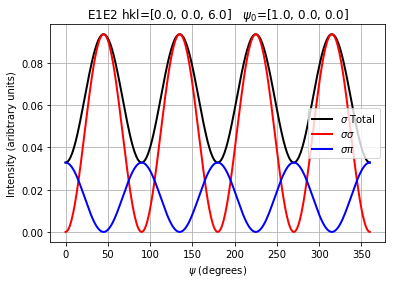

In [2]:
import TensorScatteringClass as ten
import numpy as np

#t=ten.TensorScatteringClass(CIFfile='/home/spc93/spc_cifs/nchem.2848-s6.cif', Site='Cu1');
t=ten.TensorScatteringClass(CIFfile='/home/spc93/spc_cifs/Ge_icsd_53642.cif', Site='Ge1');

t.PlotIntensityInPolarizationChannels('E1E2', lam=12.4/11.1, hkl=np.array([0,0,6]), hkln=np.array([1,0,0]), K=3, Time=1, Parity=-1, mk=None, lk=None, sk=None, sigmapi='sigma')
t.print_tensors()

<IPython.core.display.Javascript object>


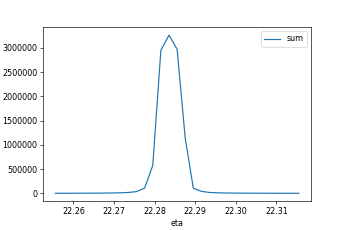

In [18]:
#Ge 004
n=pdnx(p % 741900)
n.plot('eta', 'sum')

<IPython.core.display.Javascript object>


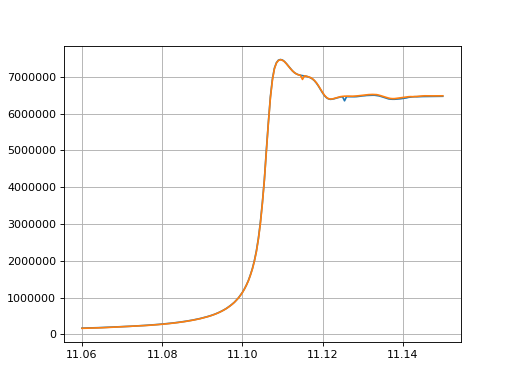

<IPython.core.display.Javascript object>


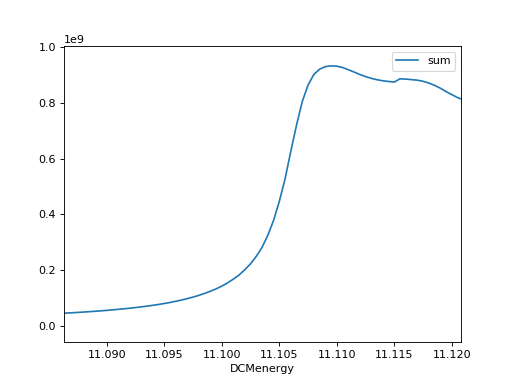

In [97]:
#Ge K fluo
figure()
n=pdnx(p % 741919)
plot(n.DCMenergy, n['sum']/n.ic1monitor)
n=pdnx(p % 741920)
plot(n.DCMenergy, n['sum']/n.ic1monitor)
grid()
n.plot('DCMenergy','sum')

<IPython.core.display.Javascript object>


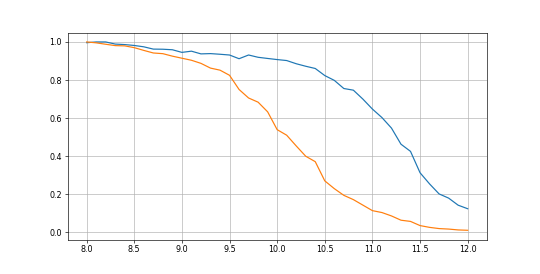

In [25]:
#pilatus threshold
figure()
n=pdnx(p % 741947)
plot(n.pil3_tresh, n['roi1_sum']/max(n['roi1_sum']))
n=pdnx(p % 741948)
plot(n.pil3_tresh, n['roi1_sum']/max(n['roi1_sum']))
grid()

<IPython.core.display.Javascript object>


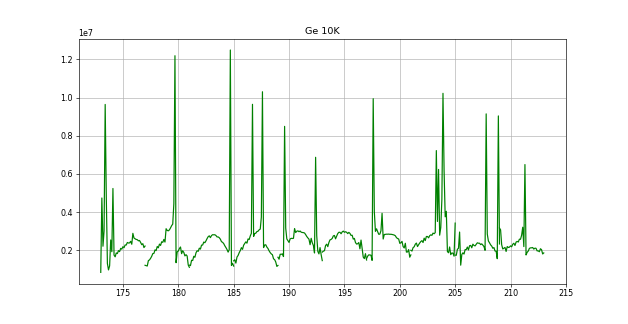

In [45]:
#pilatus threshold
figure()
for scan in range(742069,742089,2):
    n=pdnx(p % scan)
    plot(n.psi, n.roi1_sum, 'g')
title('Ge 10K')
grid()

<IPython.core.display.Javascript object>


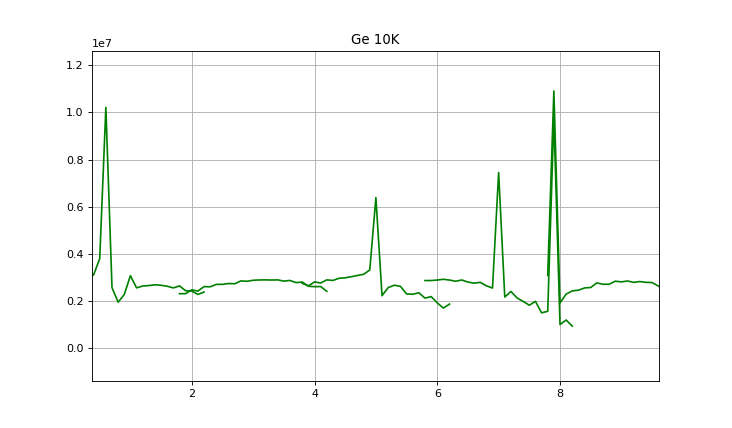

In [80]:
#psi scans 10K Ge
figure()
for scan in range(742112,742262+1,3):
    n=pdnx(p % scan)
    plot(n.psi-180, n.roi1_sum, 'g')
title('Ge 10K')
grid()

### delete below
#for scan in range(742276,742426+1,3):
#    n=pdnx(p % scan)
#    plot(n.psi, n.roi1_sum, 'b')
#title('SiGe 10K')



<IPython.core.display.Javascript object>


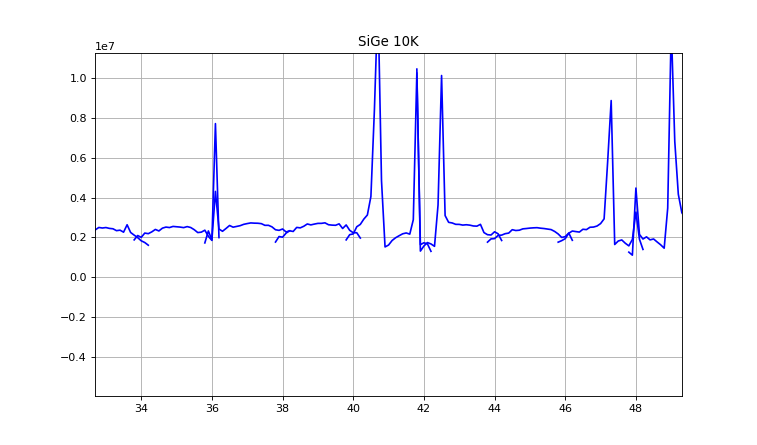

In [81]:
#psi scans 10K SiGe
figure()
for scan in range(742276,742426+1,3):
    n=pdnx(p % scan)
    plot(n.psi-180, n.roi1_sum, 'b')
title('SiGe 10K')
grid()

<IPython.core.display.Javascript object>


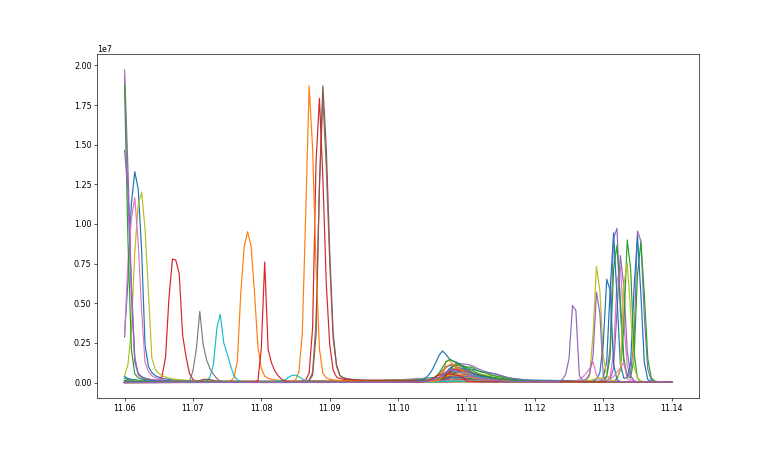

In [87]:
escans=[]
figure()
for scan in range(742471,742669+1):
    n=pdnx(p % scan)
    try:
        plot(n.DCMenergy, n.roi1_sum)
        escans+=[scan]
    except:
        pass

In [2]:
escans={}
psivals=[14.7, 41, 63, 92.8, 0, 18, 33, 45]

allscans=range(742471,742717+1)
for psival in psivals:
    print psival
    escans[psival]=[]
    for scan in range(742471,742669+1):
        n=pdnx(p % scan)
        try:
            n.DCMenergy
            if abs(float(n.nx.entry1.before_scan.psi.psi)+180 - psival)<0.01:
                escans[psival]+=[scan]
        except:
            pass

escans

14.7


/dls_sw/i16/software/python/dlstools/pdnx.py:62: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  setattr(self,'nx',_nx)


41
63
92.8
0
18
33
45


In [4]:
escans={0: [742489, 742525, 742561, 742597, 742633],
 14.7: [742471, 742507, 742543, 742579, 742615, 742651],
 18: [742493, 742529, 742565, 742601, 742637],
 33: [742497, 742533, 742569, 742605, 742641],
 41: [742475, 742511, 742547, 742583, 742619, 742655],
 45: [742501, 742537, 742573, 742609, 742645],
 63: [742479, 742515, 742551, 742587, 742623, 742659],
 92.8: [742483, 742519, 742555, 742591, 742627, 742663]}

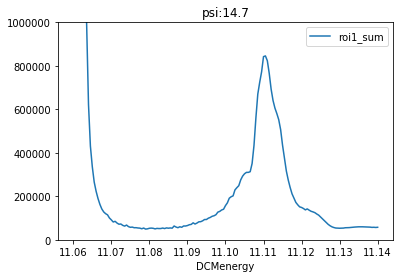

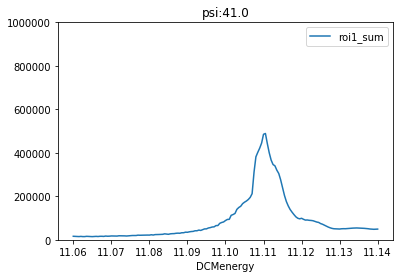

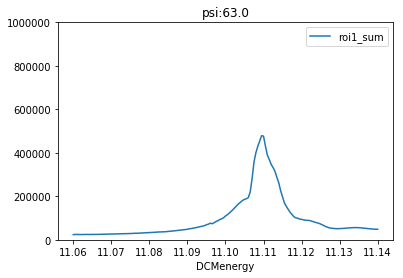

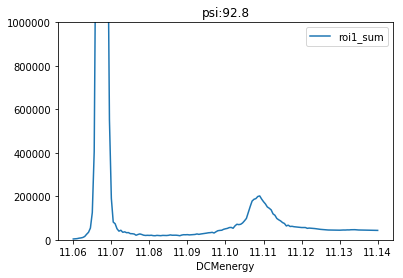

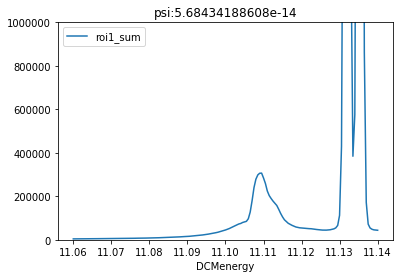

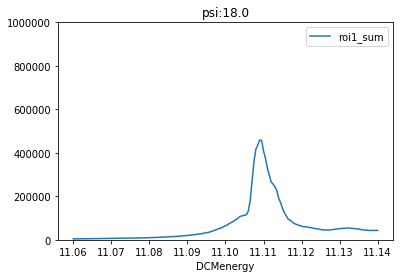

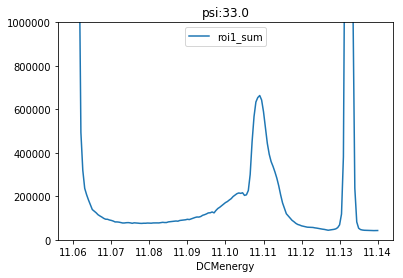

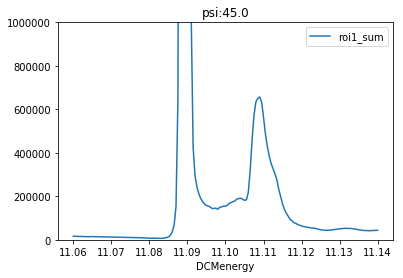

In [13]:
for psi in psivals:
    scan = escans[psi][0]
    n=pdnx(p % scan)
    n.plot('DCMenergy','roi1_sum')
    title('psi:'+str(n.nx.entry1.before_scan.psi.psi+180))
    ylim([0,1000000])

In [98]:
#files from night01march2019a.py
etascans_10k={
'Ge psi=14.7'  :range(742755, 742874+1),
'Ge psi=41'    :range(742903, 743022+1),
'Ge psi=63'    :range(743027, 743146+1),
'Ge psi=57'    :range(743151, 743270+1),   
'Ge psi=88.5'  :range(743275, 743394+1),
'Ge psi=3'     :range(744030, 744149+1),  
'SiGe psi=0'   :range(743401, 743520+1),
'SiGe psi=18'  :range(743525, 743644+1),
'SiGe psi=21.8':range(743649, 743768+1),
'SiGe psi=24.3':range(743773, 743892+1),
'SiGe psi=32'  :range(743897, 744016+1),
'SiGe psi=38.5':range(744156, 744275+1)
}

Ge psi=41


<IPython.core.display.Javascript object>


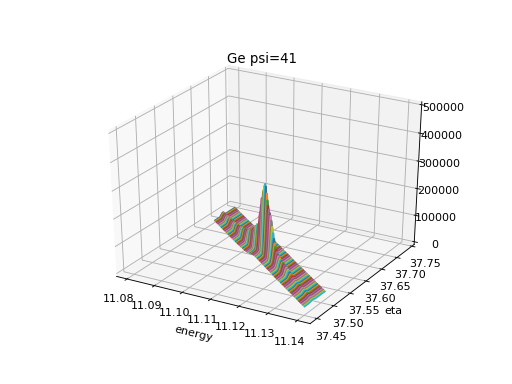

SiGe psi=24.3


<IPython.core.display.Javascript object>


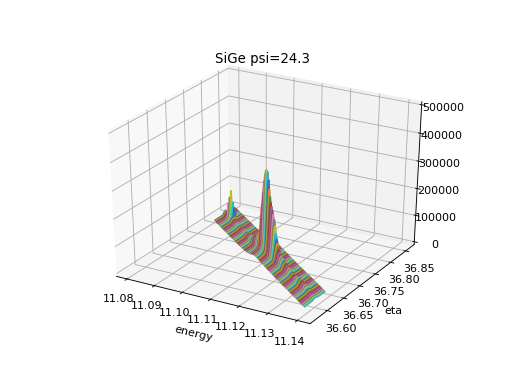

SiGe psi=18


<IPython.core.display.Javascript object>


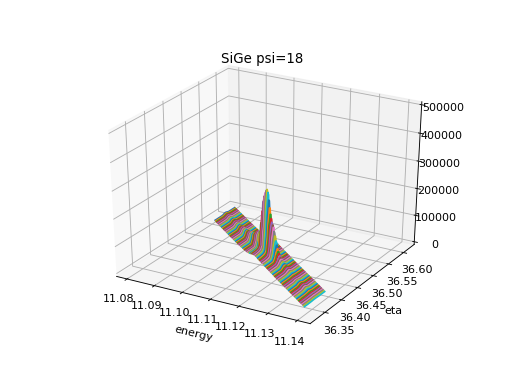

Ge psi=57


<IPython.core.display.Javascript object>


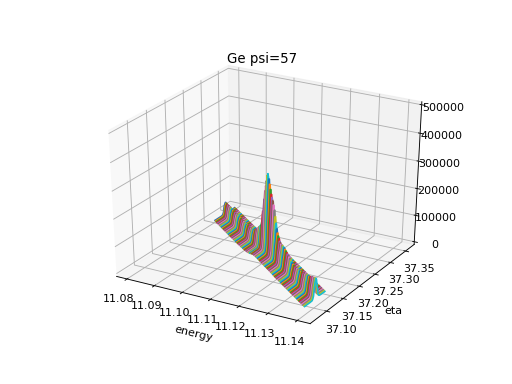

Ge psi=63


<IPython.core.display.Javascript object>


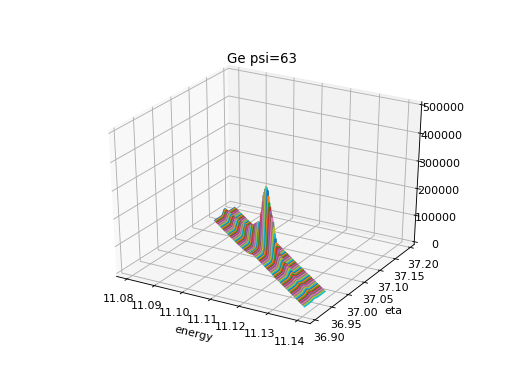

SiGe psi=38.5


<IPython.core.display.Javascript object>


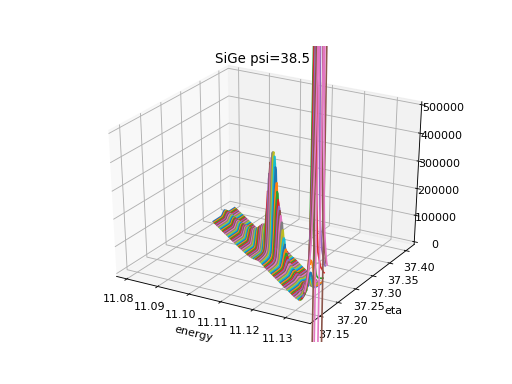

SiGe psi=32


<IPython.core.display.Javascript object>


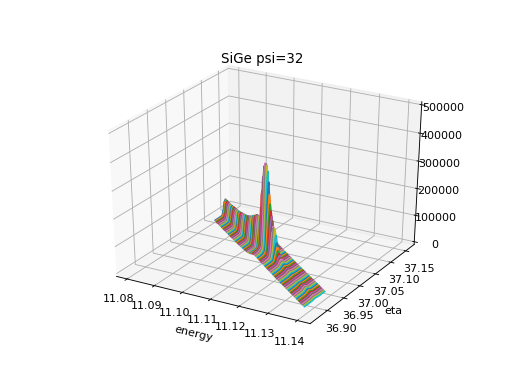

Ge psi=14.7


<IPython.core.display.Javascript object>


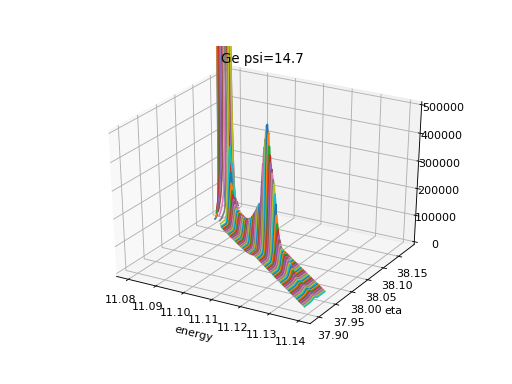

Ge psi=3


<IPython.core.display.Javascript object>


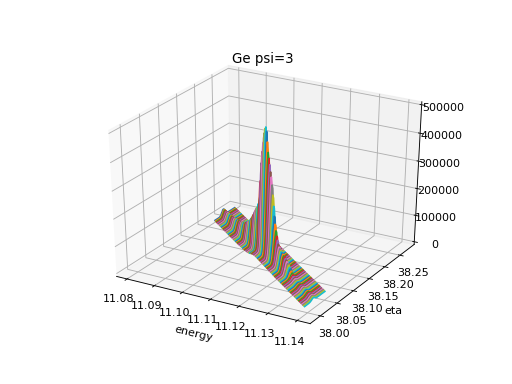

SiGe psi=21.8


<IPython.core.display.Javascript object>


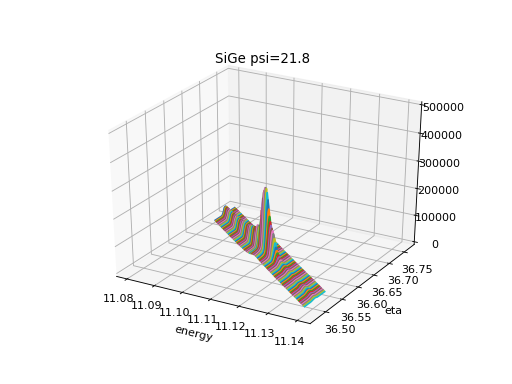

SiGe psi=0


<IPython.core.display.Javascript object>


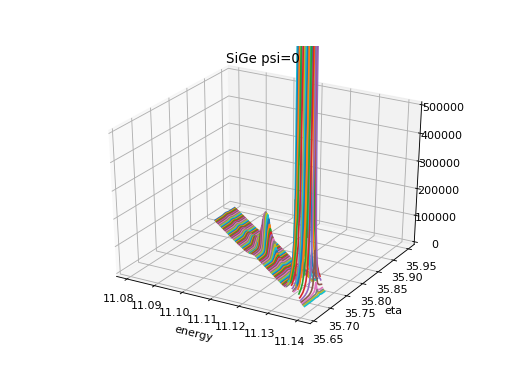

Ge psi=88.5


<IPython.core.display.Javascript object>


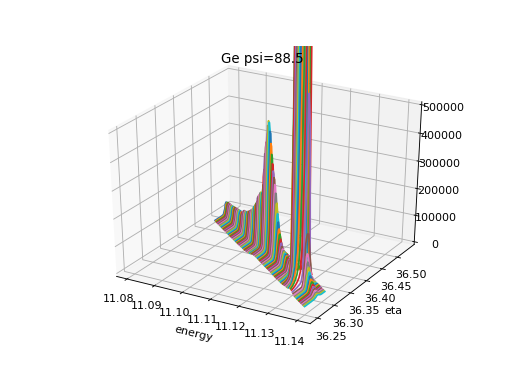

In [94]:
for dataset in etascans_10k.keys():
    print dataset
    figure()
    for scan in etascans_10k[dataset]:
        n=pdnx(p % scan)
        n['energy']=n.nx.entry1.sample.beam.incident_energy 
        gca(projection='3d').plot(n.energy, n.eta, n.roi1_sum)
    gca().set_zlim3d(0, 500000)
    xlabel('energy'); ylabel('eta'); title(dataset)

In [5]:
#eta vs energy (wide energy range) from night02march2019a.py
etascanswide_10k={
'Ge psi=3 atten 0'      :range(744537, 744607+1),
'Ge psi=3 atten 30'     :range(744615, 744685+1),
'Ge psi=41 atten 30'    :range(744689, 744759+1),
'Ge psi=63 atten 30'    :range(744763, 744833+1),
'SiGe psi=0 atten 30'   :range(744839, 744909+1),
'SiGe psi=18 atten 30'  :range(744913, 744983+1),
'SiGe psi=24.3 atten 30':range(744987, 745057+1),
}

Ge psi=3 atten 0
Ge psi=41 atten 30
SiGe psi=0 atten 30
SiGe psi=18 atten 30
Ge psi=3 atten 30
SiGe psi=24.3 atten 30
Ge psi=63 atten 30


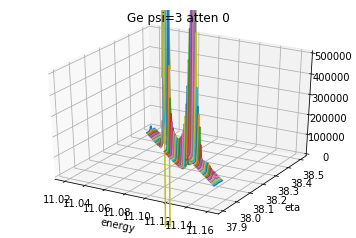

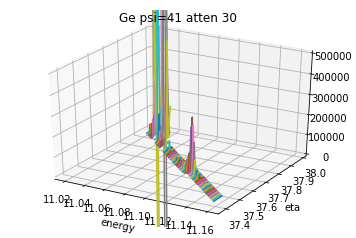

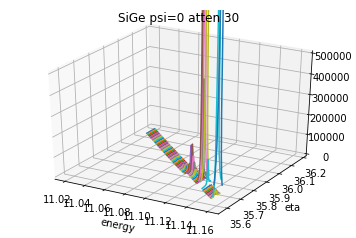

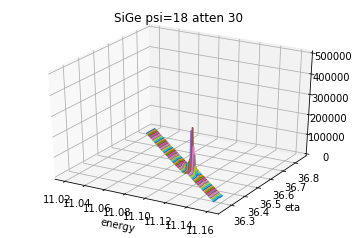

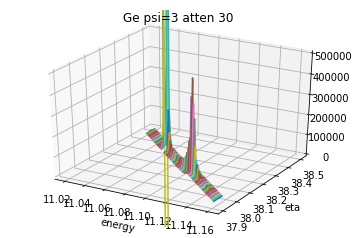

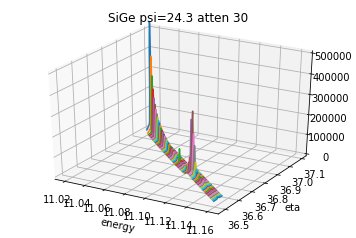

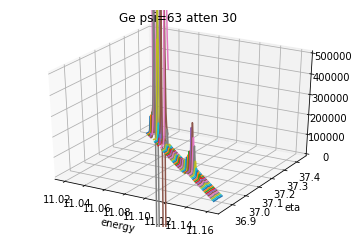

In [6]:
for dataset in etascanswide_10k.keys():
    print dataset
    figure()
    for scan in etascans_10k[dataset]:
        n=pdnx(p % scan)
        n['energy']=n.nx.entry1.sample.beam.incident_energy 
        gca(projection='3d').plot(n.energy, n.eta, n.roi1_sum)
    gca().set_zlim3d(0, 500000)
    xlabel('energy'); ylabel('eta'); title(dataset)

In [3]:
#n = pdnx(p % 744358)
#n.find('psi')

for scan in range(744358, 745057+1):
    n = pdnx(p % scan)
    print n.scan
    print 'psi:', n.nx.entry1.before_scan.psi.psi
    print


/dls/i16/data/2019/mt19842-2/744358.nxs
scan eta 34.11083394638348 35.11083394638348 0.01 BeamOK pil3_100k 0.5 roi2
psi: 1.1547006869e-05

/dls/i16/data/2019/mt19842-2/744359.nxs
scan chi 89.49999999999997 90.49999999999997 0.05 BeamOK pil3_100k 0.5 scchiroi
psi: 17.2841522786

/dls/i16/data/2019/mt19842-2/744360.nxs
scan eta 34.71083394638333 35.11083394638334 0.01 BeamOK pil3_100k 0.5 roi2
psi: 12.041759038

/dls/i16/data/2019/mt19842-2/744361.nxs
scan eta 34.669232379969586 35.06923237996959 0.01 BeamOK pil3_100k 0.5 roi2
psi: -2.51718291279e-05

/dls/i16/data/2019/mt19842-2/744362.nxs
scan chi 89.79999999999997 90.19999999999997 0.02 BeamOK pil3_100k 0.5 scchiroi
psi: 7.10882205605

/dls/i16/data/2019/mt19842-2/744363.nxs
scan eta 35.11824755951977 35.23824755951978 0.004 BeamOK pil3_100k 0.5 roi1
psi: 6.27368905077e-05

/dls/i16/data/2019/mt19842-2/744364.nxs
scan eta 34.73575665026303 35.13575665026303 0.01 BeamOK pil3_100k 0.5 roi2
psi: 7.95699653547

/dls/i16/data/2019/mt19842-

/dls/i16/data/2019/mt19842-2/744418.nxs
scan eta 37.31631248994692 37.71631248994692 0.01 BeamOK pil3_100k 0.5 roi2
psi: 123.604313209

/dls/i16/data/2019/mt19842-2/744419.nxs
scan chi 88.34926202832884 88.74926202832884 0.02 BeamOK pil3_100k 0.5 scchiroi
psi: 125.027006874

/dls/i16/data/2019/mt19842-2/744420.nxs
scan eta 37.71270705212099 37.832707052120995 0.004 BeamOK pil3_100k 0.5 roi1
psi: 127.115654281

/dls/i16/data/2019/mt19842-2/744421.nxs
scan eta 37.42939593185235 37.82939593185235 0.01 BeamOK pil3_100k 0.5 roi2
psi: 128.697371385

/dls/i16/data/2019/mt19842-2/744422.nxs
scan chi 88.45544843699984 88.85544843699985 0.02 BeamOK pil3_100k 0.5 scchiroi
psi: 129.280161442

/dls/i16/data/2019/mt19842-2/744423.nxs
scan eta 37.83037960745395 37.950379607453954 0.004 BeamOK pil3_100k 0.5 roi1
psi: 132.010709338

/dls/i16/data/2019/mt19842-2/744424.nxs
scan eta 37.469467137906534 37.86946713790654 0.01 BeamOK pil3_100k 0.5 roi2
psi: 130.520721495

/dls/i16/data/2019/mt19842-2/744425

/dls/i16/data/2019/mt19842-2/744478.nxs
scan eta 36.87008771377041 37.270087713770415 0.01 BeamOK pil3_100k 0.5 roi2
psi: -109.961207257

/dls/i16/data/2019/mt19842-2/744479.nxs
scan chi 91.22606502136118 91.62606502136119 0.02 BeamOK pil3_100k 0.5 scchiroi
psi: -119.251903346

/dls/i16/data/2019/mt19842-2/744480.nxs
scan eta 37.252443637404504 37.37244363740451 0.004 BeamOK pil3_100k 0.5 roi1
psi: -114.518521301

/dls/i16/data/2019/mt19842-2/744481.nxs
scan eta 36.641687030455905 37.04168703045591 0.01 BeamOK pil3_100k 0.5 roi2
psi: -100.758660639

/dls/i16/data/2019/mt19842-2/744482.nxs
scan chi 91.275923688748 91.675923688748 0.02 BeamOK pil3_100k 0.5 scchiroi
psi: -109.526958376

/dls/i16/data/2019/mt19842-2/744483.nxs
scan eta 37.028279580395136 37.14827958039514 0.004 BeamOK pil3_100k 0.5 roi1
psi: -105.953289565

/dls/i16/data/2019/mt19842-2/744484.nxs
scan eta 36.39792637039037 36.79792637039038 0.01 BeamOK pil3_100k 0.5 roi2
psi: -91.767085057

/dls/i16/data/2019/mt19842-2/744

/dls/i16/data/2019/mt19842-2/744538.nxs
scan eta 38.43655202584376 38.49655202584376 0.002 BeamOK pil3_100k 0.5 roi1
psi: -176.951851073

/dls/i16/data/2019/mt19842-2/744539.nxs
scan eta 38.42880671638569 38.48880671638569 0.002 BeamOK pil3_100k 0.5 roi1
psi: -176.952038974

/dls/i16/data/2019/mt19842-2/744540.nxs
scan eta 38.42106499623293 38.48106499623293 0.002 BeamOK pil3_100k 0.5 roi1
psi: -176.952016073

/dls/i16/data/2019/mt19842-2/744541.nxs
scan eta 38.413326862631806 38.47332686263181 0.002 BeamOK pil3_100k 0.5 roi1
psi: -176.952036728

/dls/i16/data/2019/mt19842-2/744542.nxs
scan eta 38.40559231283243 38.465592312832435 0.002 BeamOK pil3_100k 0.5 roi1
psi: -176.951923965

/dls/i16/data/2019/mt19842-2/744543.nxs
scan eta 38.39786134408743 38.45786134408743 0.002 BeamOK pil3_100k 0.5 roi1
psi: -176.952036081

/dls/i16/data/2019/mt19842-2/744544.nxs
scan eta 38.390133953653056 38.45013395365306 0.002 BeamOK pil3_100k 0.5 roi1
psi: -176.951963975

/dls/i16/data/2019/mt19842-2/74

/dls/i16/data/2019/mt19842-2/744598.nxs
scan eta 37.978093797368 38.038093797368 0.002 BeamOK pil3_100k 0.5 roi1
psi: -176.951966709

/dls/i16/data/2019/mt19842-2/744599.nxs
scan eta 37.97055907669995 38.03055907669995 0.002 BeamOK pil3_100k 0.5 roi1
psi: -176.95197847

/dls/i16/data/2019/mt19842-2/744600.nxs
scan eta 37.96302778546625 38.023027785466255 0.002 BeamOK pil3_100k 0.5 roi1
psi: -176.952039547

/dls/i16/data/2019/mt19842-2/744601.nxs
scan eta 37.95549992109099 38.01549992109099 0.002 BeamOK pil3_100k 0.5 roi1
psi: -176.951965315

/dls/i16/data/2019/mt19842-2/744602.nxs
scan eta 37.94797548100206 38.00797548100206 0.002 BeamOK pil3_100k 0.5 roi1
psi: -176.952298555

/dls/i16/data/2019/mt19842-2/744603.nxs
scan eta 37.940454462629205 38.00045446262921 0.002 BeamOK pil3_100k 0.5 roi1
psi: -176.952037734

/dls/i16/data/2019/mt19842-2/744604.nxs
scan eta 37.932936863406056 37.99293686340606 0.002 BeamOK pil3_100k 0.5 roi1
psi: -176.951994276

/dls/i16/data/2019/mt19842-2/744605.

/dls/i16/data/2019/mt19842-2/744658.nxs
scan eta 38.11383912712254 38.17383912712254 0.002 BeamOK pil3_100k 0.5 roi1
psi: -176.95191203

/dls/i16/data/2019/mt19842-2/744659.nxs
scan eta 38.10624223297277 38.16624223297277 0.002 BeamOK pil3_100k 0.5 roi1
psi: -176.951961186

/dls/i16/data/2019/mt19842-2/744660.nxs
scan eta 38.098648815104994 38.158648815104996 0.002 BeamOK pil3_100k 0.5 roi1
psi: -176.952033022

/dls/i16/data/2019/mt19842-2/744661.nxs
scan eta 38.091058870892056 38.15105887089206 0.002 BeamOK pil3_100k 0.5 roi1
psi: -176.948516191

/dls/i16/data/2019/mt19842-2/744662.nxs
scan eta 38.08347239771004 38.14347239771004 0.002 BeamOK pil3_100k 0.5 roi1
psi: -176.951978343

/dls/i16/data/2019/mt19842-2/744663.nxs
scan eta 38.0758893929373 38.1358893929373 0.002 BeamOK pil3_100k 0.5 roi1
psi: -176.951920424

/dls/i16/data/2019/mt19842-2/744664.nxs
scan eta 38.06830985395592 38.12830985395592 0.002 BeamOK pil3_100k 0.5 roi1
psi: -176.952072051

/dls/i16/data/2019/mt19842-2/74466

/dls/i16/data/2019/mt19842-2/744718.nxs
scan eta 37.69851642840913 37.75851642840913 0.002 BeamOK pil3_100k 0.5 roi1
psi: -138.357179558

/dls/i16/data/2019/mt19842-2/744719.nxs
scan eta 37.690870588820296 37.7508705888203 0.002 BeamOK pil3_100k 0.5 roi1
psi: -138.357756916

/dls/i16/data/2019/mt19842-2/744720.nxs
scan eta 37.68322826260125 37.74322826260125 0.002 BeamOK pil3_100k 0.5 roi1
psi: -138.356758199

/dls/i16/data/2019/mt19842-2/744721.nxs
scan eta 37.67558944708397 37.735589447083974 0.002 BeamOK pil3_100k 0.5 roi1
psi: -138.357571122

/dls/i16/data/2019/mt19842-2/744722.nxs
scan eta 37.66795413960274 37.727954139602744 0.002 BeamOK pil3_100k 0.5 roi1
psi: -138.357688234

/dls/i16/data/2019/mt19842-2/744723.nxs
scan eta 37.66032233749502 37.72032233749502 0.002 BeamOK pil3_100k 0.5 roi1
psi: -138.357633258

/dls/i16/data/2019/mt19842-2/744724.nxs
scan eta 37.65269403810231 37.71269403810231 0.002 BeamOK pil3_100k 0.5 roi1
psi: -138.356691929

/dls/i16/data/2019/mt19842-2/744

/dls/i16/data/2019/mt19842-2/744778.nxs
scan eta 37.260030373459564 37.320030373459566 0.002 BeamOK pil3_100k 0.5 roi1
psi: -116.073570398

/dls/i16/data/2019/mt19842-2/744779.nxs
scan eta 37.25233506485066 37.312335064850664 0.002 BeamOK pil3_100k 0.5 roi1
psi: -116.073618842

/dls/i16/data/2019/mt19842-2/744780.nxs
scan eta 37.244643307281684 37.30464330728169 0.002 BeamOK pil3_100k 0.5 roi1
psi: -116.073380615

/dls/i16/data/2019/mt19842-2/744781.nxs
scan eta 37.23695509804225 37.296955098042254 0.002 BeamOK pil3_100k 0.5 roi1
psi: -116.073759527

/dls/i16/data/2019/mt19842-2/744782.nxs
scan eta 37.229270434425125 37.28927043442513 0.002 BeamOK pil3_100k 0.5 roi1
psi: -116.073238589

/dls/i16/data/2019/mt19842-2/744783.nxs
scan eta 37.2215893137262 37.2815893137262 0.002 BeamOK pil3_100k 0.5 roi1
psi: -116.072651831

/dls/i16/data/2019/mt19842-2/744784.nxs
scan eta 37.213911733244196 37.2739117332442 0.002 BeamOK pil3_100k 0.5 roi1
psi: -116.073612661

/dls/i16/data/2019/mt19842-2/7

/dls/i16/data/2019/mt19842-2/744838.nxs
scan eta 35.777598072555946 35.83759807255595 0.002 BeamOK pil3_100k 0.5 roi1
psi: -179.999550185

/dls/i16/data/2019/mt19842-2/744839.nxs
scan eta 36.11954649419304 36.17954649419304 0.002 BeamOK pil3_100k 0.5 roi1
psi: -179.999550185

/dls/i16/data/2019/mt19842-2/744840.nxs
scan eta 36.111724050553654 36.17172405055366 0.002 BeamOK pil3_100k 0.5 roi1
psi: -179.999548436

/dls/i16/data/2019/mt19842-2/744841.nxs
scan eta 36.10390524808907 36.16390524808907 0.002 BeamOK pil3_100k 0.5 roi1
psi: -179.999544939

/dls/i16/data/2019/mt19842-2/744842.nxs
scan eta 36.096090111488515 36.15609011148852 0.002 BeamOK pil3_100k 0.5 roi1
psi: -179.99953095

/dls/i16/data/2019/mt19842-2/744843.nxs
scan eta 36.088278555444624 36.14827855544463 0.002 BeamOK pil3_100k 0.5 roi1
psi: -179.999548436

/dls/i16/data/2019/mt19842-2/744844.nxs
scan eta 36.080470659652896 36.1404706596529 0.002 BeamOK pil3_100k 0.5 roi1
psi: -179.999546687

/dls/i16/data/2019/mt19842-2/74

/dls/i16/data/2019/mt19842-2/744898.nxs
scan eta 35.66416242210375 35.72416242210375 0.002 BeamOK pil3_100k 0.5 roi1
psi: -179.999548436

/dls/i16/data/2019/mt19842-2/744899.nxs
scan eta 35.65655010003993 35.71655010003993 0.002 BeamOK pil3_100k 0.5 roi1
psi: -179.999548436

/dls/i16/data/2019/mt19842-2/744900.nxs
scan eta 35.64894125861482 35.70894125861482 0.002 BeamOK pil3_100k 0.5 roi1
psi: -179.999546687

/dls/i16/data/2019/mt19842-2/744901.nxs
scan eta 35.64133589519759 35.701335895197595 0.002 BeamOK pil3_100k 0.5 roi1
psi: -179.999546687

/dls/i16/data/2019/mt19842-2/744902.nxs
scan eta 35.63373400716035 35.69373400716035 0.002 BeamOK pil3_100k 0.5 roi1
psi: -179.999548436

/dls/i16/data/2019/mt19842-2/744903.nxs
scan eta 35.62613559187805 35.68613559187805 0.002 BeamOK pil3_100k 0.5 roi1
psi: -179.999548436

/dls/i16/data/2019/mt19842-2/744904.nxs
scan eta 35.61854064672854 35.67854064672854 0.002 BeamOK pil3_100k 0.5 roi1
psi: -179.999546687

/dls/i16/data/2019/mt19842-2/7449

/dls/i16/data/2019/mt19842-2/744958.nxs
scan eta 36.43893200423195 36.49893200423195 0.002 BeamOK pil3_100k 0.5 roi1
psi: -161.999764084

/dls/i16/data/2019/mt19842-2/744959.nxs
scan eta 36.43127067534645 36.49127067534645 0.002 BeamOK pil3_100k 0.5 roi1
psi: -161.999762325

/dls/i16/data/2019/mt19842-2/744960.nxs
scan eta 36.42361286423968 36.48361286423968 0.002 BeamOK pil3_100k 0.5 roi1
psi: -161.999762325

/dls/i16/data/2019/mt19842-2/744961.nxs
scan eta 36.415958568239525 36.47595856823953 0.002 BeamOK pil3_100k 0.5 roi1
psi: -161.999764085

/dls/i16/data/2019/mt19842-2/744962.nxs
scan eta 36.40830778467694 36.468307784676945 0.002 BeamOK pil3_100k 0.5 roi1
psi: -161.999762325

/dls/i16/data/2019/mt19842-2/744963.nxs
scan eta 36.40066051088579 36.460660510885795 0.002 BeamOK pil3_100k 0.5 roi1
psi: -161.999764085

/dls/i16/data/2019/mt19842-2/744964.nxs
scan eta 36.39301674420293 36.453016744202934 0.002 BeamOK pil3_100k 0.5 roi1
psi: -161.999762325

/dls/i16/data/2019/mt19842-2/7

/dls/i16/data/2019/mt19842-2/745018.nxs
scan eta 36.79162108170869 36.85162108170869 0.002 BeamOK pil3_100k 0.5 roi1
psi: -155.699858167

/dls/i16/data/2019/mt19842-2/745019.nxs
scan eta 36.783910221677196 36.8439102216772 0.002 BeamOK pil3_100k 0.5 roi1
psi: -155.699992775

/dls/i16/data/2019/mt19842-2/745020.nxs
scan eta 36.77620291714823 36.836202917148235 0.002 BeamOK pil3_100k 0.5 roi1
psi: -155.699858171

/dls/i16/data/2019/mt19842-2/745021.nxs
scan eta 36.76849916540767 36.82849916540767 0.002 BeamOK pil3_100k 0.5 roi1
psi: -155.699858168

/dls/i16/data/2019/mt19842-2/745022.nxs
scan eta 36.7607989637443 36.8207989637443 0.002 BeamOK pil3_100k 0.5 roi1
psi: -155.69985817

/dls/i16/data/2019/mt19842-2/745023.nxs
scan eta 36.753102309450036 36.81310230945004 0.002 BeamOK pil3_100k 0.5 roi1
psi: -155.699859933

/dls/i16/data/2019/mt19842-2/745024.nxs
scan eta 36.7454091998198 36.8054091998198 0.002 BeamOK pil3_100k 0.5 roi1
psi: -155.699868759

/dls/i16/data/2019/mt19842-2/745025.n